In [69]:
#pip install xgboost

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.svm import SVC
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras import Sequential
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [248]:
train_df=pd.read_csv("Downloads/credit_train.csv")
test_df=pd.read_csv("Downloads/credit_test.csv")

In [250]:
train_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [252]:
df1=test_df

In [254]:
train_df['target'].value_counts()

target
0    67396
1     1258
Name: count, dtype: int64

In [256]:
train_df.shape

(68654, 16)

In [258]:
test_df.shape

(18594, 15)

In [260]:
train_df.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

In [262]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,68654.0,254390.256780,26642.719918,145.0,248945.750000,255361.0,262269.25,3.127370e+05
tbl_loan_id,68654.0,263056.266248,39486.661487,101323.0,233942.250000,260305.5,286962.75,3.753200e+05
lender_id,68654.0,266420.528462,3590.999004,245684.0,267278.000000,267278.0,267278.00,2.672780e+05
Total_Amount,68654.0,14836.828617,141649.868388,2.0,2295.000000,5249.0,11450.00,2.300000e+07
Total_Amount_to_Repay,68654.0,15639.929901,165078.352830,0.0,2329.000000,5325.0,11650.00,2.541500e+07
duration,68654.0,8.544586,13.343145,1.0,7.000000,7.0,7.00,1.096000e+03
Amount_Funded_By_Lender,68654.0,2545.663204,11922.724169,0.0,234.000000,915.0,2272.65,1.600000e+06
Lender_portion_Funded,68654.0,0.218679,0.129832,0.0,0.118712,0.3,0.30,1.168119e+00
Lender_portion_to_be_repaid,68654.0,2652.621493,13380.063537,0.0,239.000000,934.0,2317.00,1.821338e+06
target,68654.0,0.018324,0.134120,0.0,0.000000,0.0,0.00,1.000000e+00


In [264]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [266]:
train_df['country_id'].value_counts()

country_id
Kenya    68654
Name: count, dtype: int64

In [268]:
test_df['country_id'].value_counts(normalize=True)*100

country_id
Kenya    81.042272
Ghana    18.957728
Name: proportion, dtype: float64

In [270]:
#combine test and train data
#data=pd.concat([train_df,test_df]).reset_index(drop=True)
train_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [272]:
train_df['loan_type'].value_counts()

loan_type
Type_1     61723
Type_7      2790
Type_5      1521
Type_4      1235
Type_10      466
Type_6       357
Type_9       205
Type_14       99
Type_2        74
Type_11       42
Type_18       30
Type_17       23
Type_12       21
Type_23       18
Type_20       13
Type_16       12
Type_13       10
Type_19        4
Type_15        4
Type_21        3
Type_24        3
Type_22        1
Name: count, dtype: int64

In [274]:
train_df[(train_df['New_versus_Repeat']=='Repeat Loan') & (train_df['target']==0)]

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,244559,Kenya,228408,267278,Type_1,1460.0,1515.0,2022-07-30,2022-08-06,7,Repeat Loan,438.00,0.300000,455.0,0
68650,ID_260062217784267278,260062,Kenya,217784,267278,Type_1,5029.0,5116.0,2022-07-16,2022-07-23,7,Repeat Loan,1508.70,0.300000,1535.0,0
68651,ID_259137216701267278,259137,Kenya,216701,267278,Type_1,5289.0,5289.0,2022-07-15,2022-07-22,7,Repeat Loan,1586.70,0.300000,1587.0,0
68652,ID_266801303201267278,266801,Kenya,303201,267278,Type_1,3334.0,3334.0,2022-11-23,2022-11-30,7,Repeat Loan,741.09,0.222283,741.0,0


In [276]:
#convert to datetime
columns=['disbursement_date','due_date']
for col in columns:
    train_df[col]=pd.to_datetime(train_df[col])
    test_df[col]=pd.to_datetime(test_df[col])
    # extract month,year and date
    train_df[col+'_year']=train_df[col].dt.year
    train_df[col+'_month']=train_df[col].dt.month
    train_df[col+'_day']=train_df[col].dt.day
    #test data
    test_df[col+'_year']=test_df[col].dt.year
    test_df[col+'_month']=test_df[col].dt.month
    test_df[col+'_day']=test_df[col].dt.day

In [278]:
train_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,disbursement_date_year,disbursement_date_month,disbursement_date_day,due_date_year,due_date_month,due_date_day
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,120.85,0.014305,121.0,0,2022,8,30,2022,9,6
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,...,7768.50,0.300000,7794.0,0,2022,7,30,2022,8,6
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,...,1380.00,0.200000,1428.0,0,2024,9,6,2024,9,13
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,...,2687.40,0.300000,2770.0,0,2022,10,20,2022,10,27
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,...,1369.20,0.300000,1418.0,0,2022,11,28,2022,12,5


In [280]:
train_df=train_df.drop(columns=['disbursement_date','due_date'],axis=1)

In [282]:
test_df=test_df.drop(columns=['disbursement_date','due_date'],axis=1)

In [284]:
train_df['New_versus_Repeat'].value_counts(normalize=True)

New_versus_Repeat
Repeat Loan    0.991741
New Loan       0.008259
Name: proportion, dtype: float64

In [286]:
encoder=LabelEncoder()

In [288]:
columns=['New_versus_Repeat','loan_type','country_id','ID']
for col in columns:
    train_df[col]=encoder.fit_transform(train_df[col])
    test_df[col]=encoder.fit_transform(test_df[col])

In [290]:
train_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,disbursement_date_year,disbursement_date_month,disbursement_date_day,due_date_year,due_date_month,due_date_day
0,58734,266671,0,248032,267278,0,8448.0,8448.0,7,1,120.85,0.014305,121.0,0,2022,8,30,2022,9,6
1,16528,248919,0,228515,267278,0,25895.0,25979.0,7,1,7768.50,0.300000,7794.0,0,2022,7,30,2022,8,6
2,66407,308486,0,370501,251804,20,6900.0,7142.0,7,1,1380.00,0.200000,1428.0,0,2024,9,6,2024,9,13
3,57442,266004,0,285009,267278,0,8958.0,9233.0,7,1,2687.40,0.300000,2770.0,0,2022,10,20,2022,10,27
4,29819,253803,0,305312,267278,0,4564.0,4728.0,7,1,1369.20,0.300000,1418.0,0,2022,11,28,2022,12,5


In [292]:
test_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,disbursement_date_year,disbursement_date_month,disbursement_date_day,due_date_year,due_date_month,due_date_day
0,13651,269404,1,226088,267278,0,1919.0,1989.0,7,1,575.7,0.300000,597.0,2022,7,27,2022,8,3
1,7374,255356,1,300042,267278,0,2138.0,2153.0,7,1,0.0,0.000000,0.0,2022,11,16,2022,11,23
2,8072,257026,1,243764,267278,0,8254.0,8304.0,7,1,207.0,0.025079,208.0,2022,8,24,2022,8,31
3,12072,264617,1,299409,267278,0,3379.0,3379.0,7,1,1013.7,0.300000,1014.0,2022,11,15,2022,11,22
4,2922,247613,1,296713,267278,0,120.0,120.0,7,1,36.0,0.300000,36.0,2022,11,10,2022,11,17


In [294]:
train_df['Bank_profit']=train_df['Total_Amount_to_Repay'] - train_df['Total_Amount']
test_df['Bank_profit']=test_df['Total_Amount_to_Repay'] - test_df['Total_Amount']

In [296]:
test_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,disbursement_date_year,disbursement_date_month,disbursement_date_day,due_date_year,due_date_month,due_date_day,Bank_profit
0,13651,269404,1,226088,267278,0,1919.0,1989.0,7,1,575.7,0.300000,597.0,2022,7,27,2022,8,3,70.0
1,7374,255356,1,300042,267278,0,2138.0,2153.0,7,1,0.0,0.000000,0.0,2022,11,16,2022,11,23,15.0
2,8072,257026,1,243764,267278,0,8254.0,8304.0,7,1,207.0,0.025079,208.0,2022,8,24,2022,8,31,50.0
3,12072,264617,1,299409,267278,0,3379.0,3379.0,7,1,1013.7,0.300000,1014.0,2022,11,15,2022,11,22,0.0
4,2922,247613,1,296713,267278,0,120.0,120.0,7,1,36.0,0.300000,36.0,2022,11,10,2022,11,17,0.0


In [53]:
train_df['target'].value_counts()

target
0    67396
1     1258
Name: count, dtype: int64

<Axes: xlabel='Total_Amount'>

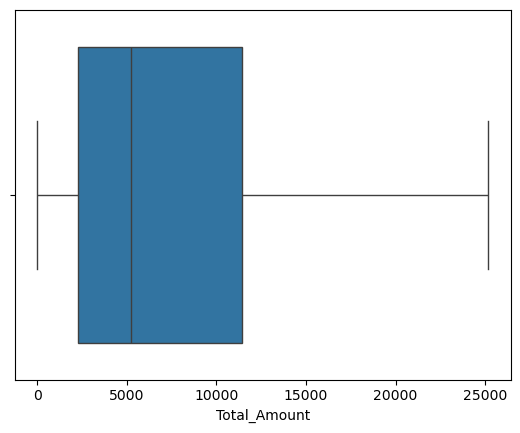

In [350]:
sns.boxplot(train_df,x='Total_Amount')

In [352]:
#handle outliers
def outliers(columns,dataset):
    for col in columns:
        percentile75=dataset[col].quantile(0.75)
        percentile25=dataset[col].quantile(0.25)
        iqr=percentile75 - percentile25
        upper_limit=percentile75 + 1.5*iqr
        outliers=dataset[(dataset[col] > upper_limit)]
        print('There are:',len(outliers))
        dataset.loc[dataset[col]> upper_limit, col]=upper_limit
    

In [354]:
outliers(['Total_Amount'],train_df)

There are: 0


In [358]:
outliers(['Total_Amount'],test_df)

There are: 0


In [298]:
y=train_df['target']
X=train_df.drop(['target'],axis=1)

In [360]:
X_train,X_test, y_train, y_test=train_test_split(X,y, stratify=y, test_size=0.3,random_state=42)

In [362]:
test_df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,disbursement_date_year,disbursement_date_month,disbursement_date_day,due_date_year,due_date_month,due_date_day,Bank_profit
0,13651,269404,1,226088,267278,0,1919.0,1989.0,7,1,575.7,0.300000,597.0,2022,7,27,2022,8,3,70.0
1,7374,255356,1,300042,267278,0,2138.0,2153.0,7,1,0.0,0.000000,0.0,2022,11,16,2022,11,23,15.0
2,8072,257026,1,243764,267278,0,8254.0,8304.0,7,1,207.0,0.025079,208.0,2022,8,24,2022,8,31,50.0
3,12072,264617,1,299409,267278,0,3379.0,3379.0,7,1,1013.7,0.300000,1014.0,2022,11,15,2022,11,22,0.0
4,2922,247613,1,296713,267278,0,120.0,120.0,7,1,36.0,0.300000,36.0,2022,11,10,2022,11,17,0.0


In [364]:
#scale the data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
test=scaler.transform(test_df)

In [306]:
X_test.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,disbursement_date_year,disbursement_date_month,disbursement_date_day,due_date_year,due_date_month,due_date_day,Bank_profit
3512,19184,249763,0,255164,267278,0,600.0,606.0,7,1,180.0,0.3,182.0,2022,9,9,2022,9,16,6.0
60439,67461,309644,0,369457,251804,20,3220.0,3333.0,7,1,644.0,0.2,667.0,2024,8,23,2024,8,30,113.0
7989,42497,259148,0,220469,267278,0,1040.0,1080.0,7,1,312.0,0.3,324.0,2022,7,20,2022,7,27,40.0
56778,12140,247038,0,302063,267278,0,2620.0,2620.0,7,1,786.0,0.3,786.0,2022,11,21,2022,11,28,0.0
49592,6582,243723,0,261889,267278,0,9198.0,9480.0,7,1,0.0,0.0,0.0,2022,9,17,2022,9,24,282.0


In [308]:
train_df['tbl_loan_id'].value_counts()

tbl_loan_id
372036    2
367976    2
306263    2
367233    2
373890    2
         ..
255313    1
228837    1
279611    1
236311    1
268933    1
Name: count, Length: 66520, dtype: int64

In [366]:
#apply smote for to upsample the minority class
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train_scaled,y_train)

In [368]:
y_train_smote.value_counts()

target
0    47176
1    47176
Name: count, dtype: int64

In [370]:
#logisticregression
lr=LogisticRegression(class_weight="balanced")
lr.fit(X_train_smote,y_train_smote)
lr_pred=lr.predict(X_test_scaled)
print("Accuracy Score:", metrics.accuracy_score(y_test, lr_pred))
print('F1 Score:',metrics.f1_score(y_test,lr_pred))
print(metrics.classification_report(y_test, lr_pred))

Accuracy Score: 0.9248919745594019
F1 Score: 0.28280018544274454
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     20220
           1       0.17      0.81      0.28       377

    accuracy                           0.92     20597
   macro avg       0.58      0.87      0.62     20597
weighted avg       0.98      0.92      0.95     20597



In [81]:
#random forest classifier
rf=RandomForestClassifier(random_state=42)
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }
scoring= {'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1'}
rf1=GridSearchCV(rf,cv_params,scoring=scoring,cv=4,refit='f1')


In [95]:
%%time
rf1.fit(X_train_smote,y_train_smote)

CPU times: total: 17min 25s
Wall time: 23min 21s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [97]:
rf1.best_score_

0.994516262780504

In [99]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [370]:
print(X_test.shape)
print(test_df.shape)

(20597, 20)
(18594, 20)


In [374]:
preds=rf1.best_estimator_.predict(X_test_scaled)

In [396]:
print("Accuracy Score:", metrics.accuracy_score(y_test, preds))
print('F1 Score:',metrics.f1_score(y_test,preds))
print(metrics.classification_report(y_test, preds))

Accuracy Score: 0.9902898480361217
F1 Score: 0.7727272727272727
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20220
           1       0.68      0.90      0.77       377

    accuracy                           0.99     20597
   macro avg       0.84      0.95      0.88     20597
weighted avg       0.99      0.99      0.99     20597



In [75]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [430]:
cv_params1 = {'learning_rate': [0.1],
             'max_depth': [6],
             #'min_child_weight': [2],
             'n_estimators': [2000],
             }
cv_params2 = {
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [4, 6, 8],             
    'min_child_weight': [1, 3, 5],      
    'n_estimators': [300, 500, 700],  
    'gamma': [0, 0.1, 0.2],            
    'subsample': [0.6, 0.8, 1.0],       
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 5]       
}


In [420]:
xgb1=GridSearchCV(xgb,cv_params1,scoring=scoring,cv=4, refit='f1')

In [434]:
%%time
xgb1.fit(X_train_smote,y_train_smote)

CPU times: total: 5min 57s
Wall time: 56.6 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [6],
                         'min_child_weight': [2], 'n_estimators': [700],
                         'scale_pos_weight': [1, 2, 5]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [436]:
xgb1.best_score_

0.9974825059069882

In [438]:
pred2=xgb1.best_estimator_.predict(X_test_scaled)

In [440]:
print("Accuracy Score:", metrics.accuracy_score(y_test, pred2))
print('F1 Score:',metrics.f1_score(y_test,pred2))
print(metrics.classification_report(y_test, pred2))

Accuracy Score: 0.9929601398261882
F1 Score: 0.8157560355781448
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20220
           1       0.78      0.85      0.82       377

    accuracy                           0.99     20597
   macro avg       0.89      0.92      0.91     20597
weighted avg       0.99      0.99      0.99     20597



In [442]:
test_predictions=xgb1.best_estimator_.predict(test)

In [444]:
submission=pd.DataFrame({
    'ID':df1['ID'],
    'Target':test_predictions
})

In [446]:
submission.head()

,ID,Target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0


In [448]:
submission.to_csv('C:/MLDatasets/submission.csv', index=False)